In [1]:
import matplotlib.pyplot as plt
import sklearn
import train
import baselines
from context import Context
import util
import numpy
import time
import torch
import os
from reporter import Reporter
from data import Data


In [9]:
context = Context(batch_size=128,
                  train_n=[1200, 1200],
                  data_dropout=0.4,
                  layer_dropout=0.4,
                  ch_conv1=16, ch_conv2=16, ch_conv3=32, l_hidden1=16,
                  l_hidden2=0, nan_mode=0, class_importance=[0.2, 0.8],
                  val_p=0.3,
                  lr=0.01, stop=1000, early_stop=100)
numpy.set_printoptions(precision=2, formatter={'int': '{:5d}'.format,
                                               'float': '{:7.2f}'.format})
start = time.time()
Context.device = torch.device(
    f"cuda:0" if torch.cuda.is_available() else "cpu")
Context.data_dir = "/home/foumani/data/solar_flare_prediction"
Context.tensorlog_dir = "tensorlog"
Context.log_dir = "log"
if not os.path.exists(Context.log_dir):
    os.makedirs(Context.log_dir)
Context.model_dir = "models"
if not os.path.exists(Context.model_dir):
    os.makedirs(Context.model_dir)
Context.files_df_filename = "all_files.csv"
Context.files_np_filename = "full_data_X_1_25.npy"
data = Data()

Reading all files df ...
Reading all files np ...


In [10]:
run_vals = []
for _ in range(10):
    context.normalization_mode = "scale"
    val, test = train.cross_val(context, data, None)
    run_vals.append(test)

Training [2, 3, 4, 5], Val 0.1, Test 1


100%|██████████| 2400/2400 [00:00<00:00, 21912.57files/s]


best val run: Metric(tss: 81.57, hss2:  81.64, cm: [[104, 13], [9, 114]])
test run    : Metric(tss: 78.97, hss2:  19.24, cm: [[64190, 8048], [124, 1130]])
Training [1, 3, 4, 5], Val 0.1, Test 2


100%|██████████| 2400/2400 [00:00<00:00, 22511.29files/s]


best val run: Metric(tss: 81.80, hss2:  81.45, cm: [[122, 13], [9, 96]])
test run    : Metric(tss: 81.75, hss2:  23.05, cm: [[79769, 7387], [137, 1264]])
Training [1, 2, 4, 5], Val 0.1, Test 3


100%|██████████| 2400/2400 [00:00<00:00, 22287.45files/s]


best val run: Metric(tss: 83.24, hss2:  83.31, cm: [[105, 12], [8, 115]])
test run    : Metric(tss: 79.23, hss2:  25.46, cm: [[34776, 6310], [77, 1347]])
Training [1, 2, 3, 5], Val 0.1, Test 4


100%|██████████| 2400/2400 [00:00<00:00, 22666.86files/s]


best val run: Metric(tss: 87.29, hss2:  85.69, cm: [[125, 15], [2, 98]])
test run    : Metric(tss: 84.96, hss2:  20.99, cm: [[42818, 7278], [6, 1159]])
Training [1, 2, 3, 4], Val 0.1, Test 5


100%|██████████| 2400/2400 [00:00<00:00, 22643.81files/s]


best val run: Metric(tss: 85.27, hss2:  84.21, cm: [[115, 17], [2, 106]])
test run    : Metric(tss: 83.70, hss2:  19.76, cm: [[67809, 6566], [74, 916]])
Training [2, 3, 4, 5], Val 0.1, Test 1
best val run: Metric(tss: 78.86, hss2:  78.41, cm: [[106, 20], [6, 108]])
test run    : Metric(tss: 77.45, hss2:  19.79, cm: [[64650, 7588], [151, 1103]])
Training [1, 3, 4, 5], Val 0.1, Test 2
best val run: Metric(tss: 81.46, hss2:  82.23, cm: [[93, 18], [3, 126]])
test run    : Metric(tss: 78.02, hss2:  12.87, cm: [[72666, 14490], [75, 1326]])
Training [1, 2, 4, 5], Val 0.1, Test 3
best val run: Metric(tss: 78.21, hss2:  78.30, cm: [[97, 22], [4, 117]])
test run    : Metric(tss: 79.16, hss2:  20.88, cm: [[32842, 8244], [11, 1413]])
Training [1, 2, 3, 5], Val 0.1, Test 4
best val run: Metric(tss: 86.67, hss2:  86.67, cm: [[104, 16], [0, 120]])
test run    : Metric(tss: 80.64, hss2:  15.92, cm: [[40398, 9698], [0, 1165]])
Training [1, 2, 3, 4], Val 0.1, Test 5
best val run: Metric(tss: 84.16, hss2

In [11]:
run_vals

[Metric(tss: 82.34, hss2:  21.86, cm: [[289362, 35589], [418, 5816]]),
 Metric(tss: 80.60, hss2:  17.08, cm: [[277391, 47560], [297, 5937]]),
 Metric(tss: 79.66, hss2:  16.49, cm: [[275946, 49005], [328, 5906]]),
 Metric(tss: 80.63, hss2:  15.50, cm: [[271340, 53611], [179, 6055]]),
 Metric(tss: 81.08, hss2:  16.64, cm: [[275505, 49446], [231, 6003]]),
 Metric(tss: 81.63, hss2:  19.54, cm: [[284183, 40768], [363, 5871]]),
 Metric(tss: 80.24, hss2:  15.86, cm: [[273110, 51841], [237, 5997]]),
 Metric(tss: 81.38, hss2:  18.38, cm: [[281069, 43882], [319, 5915]]),
 Metric(tss: 79.23, hss2:  15.22, cm: [[271217, 53734], [264, 5970]]),
 Metric(tss: 81.95, hss2:  18.82, cm: [[282001, 42950], [301, 5933]])]

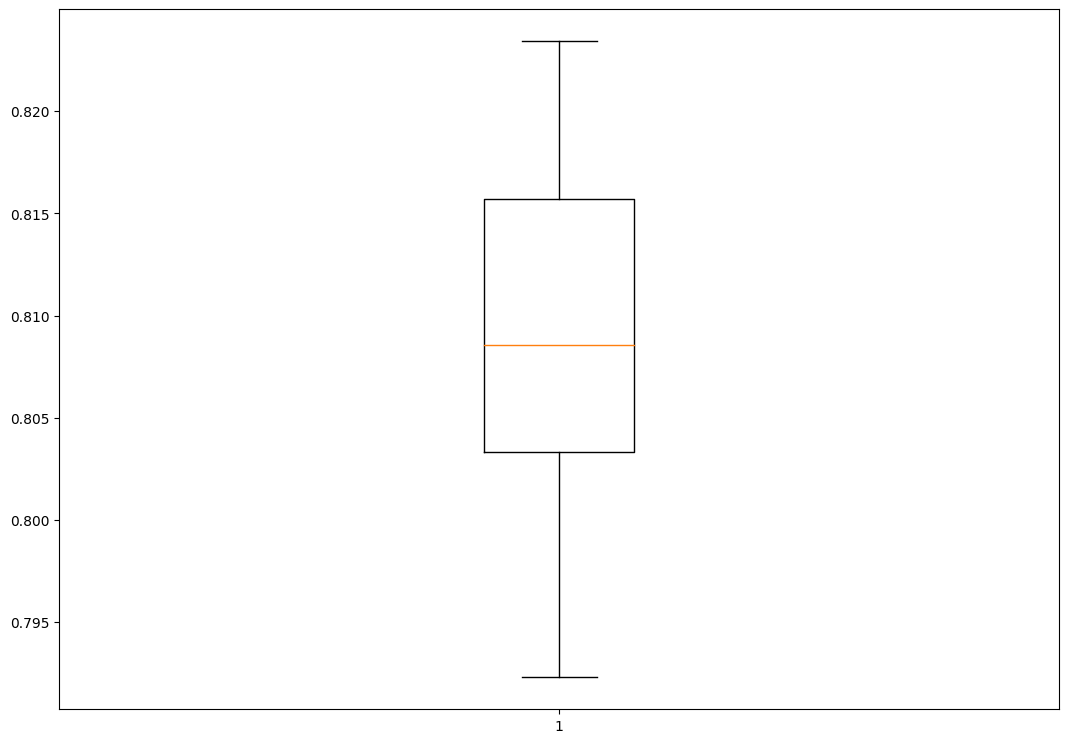

In [13]:
import numpy as np

# Creating dataset
np.random.seed(10)

data_1 = np.array([run_val.tss for run_val in run_vals])
data = [data_1]

fig = plt.figure(figsize=(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()

In [14]:
np.save("./experiments_plot/train_binary_cm.npy",
        np.array([run_val.cm for run_val in run_vals]))

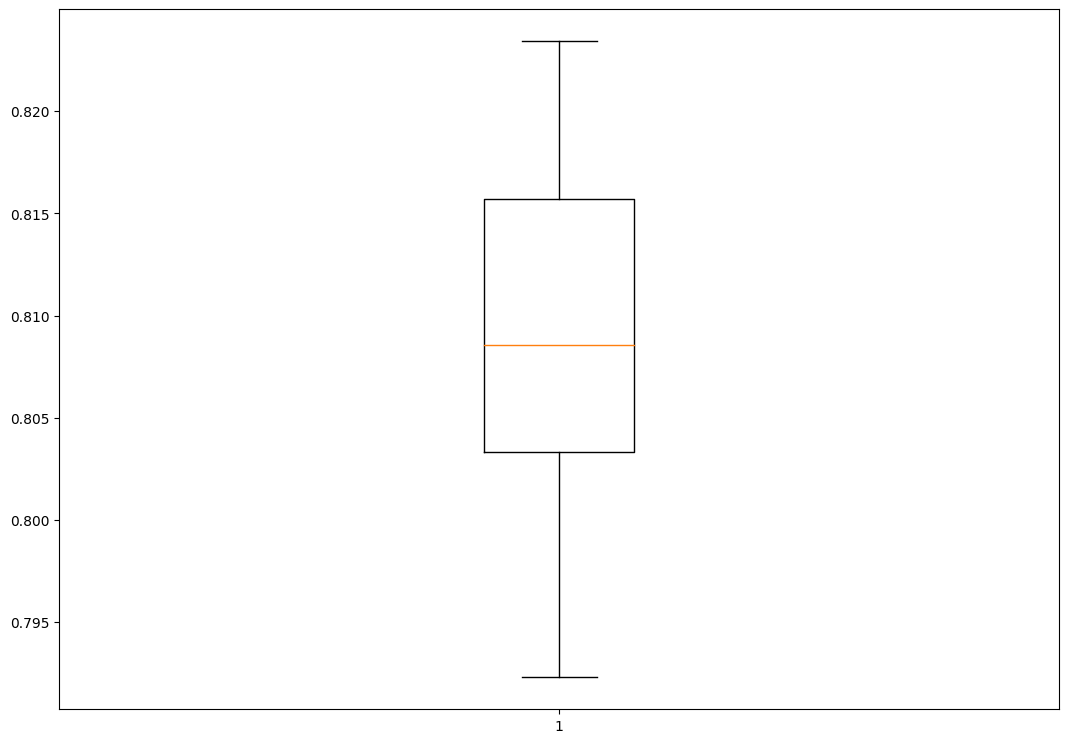

In [18]:
from util import Metric
import numpy as np

data = np.load("./experiments_plot/train_binary_cm.npy")
d = [Metric(binary=True, cm=cm) for cm in data]
datashow = np.array([m.tss for m in d])
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(datashow)
plt.show()

In [17]:
data = np.load("./experiments_plot/train_binary_cm.npy")
data

array([[[289362, 35589],
        [  418,  5816]],

       [[277391, 47560],
        [  297,  5937]],

       [[275946, 49005],
        [  328,  5906]],

       [[271340, 53611],
        [  179,  6055]],

       [[275505, 49446],
        [  231,  6003]],

       [[284183, 40768],
        [  363,  5871]],

       [[273110, 51841],
        [  237,  5997]],

       [[281069, 43882],
        [  319,  5915]],

       [[271217, 53734],
        [  264,  5970]],

       [[282001, 42950],
        [  301,  5933]]])